In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from eegTools import Channel 
from eegTools import *
from scipy.signal import argrelextrema

raw = mne.io.read_raw_edf("../data/tutorial_eeg.edf", preload=True)
#raw.info['bads'] = ['EOG EOG1', 'EOG EOG2', 'EMG EMG', 'ECG ECG', 'STI 014']
bads  = ['EOG EOG1', 'EOG EOG2', 'EMG EMG', 'ECG ECG', 'STI 014']

iir_params = dict(order=2, ftype='butter')
raw.filter(l_freq=0.3, h_freq=50., method='iir', iir_params=iir_params)
raw.set_eeg_reference([])

dataArray = raw._data
channels, samples = dataArray.shape

c=[0]*6
picked = 0 # channel index to pick
for picked in range(0,6):
    sampleCh=dataArray[picked,:]
    print("PICKED CHANNEL: %s" %(raw.info["ch_names"][picked]))
    c[picked]= Channel(sampleCh,raw.info['sfreq'],raw.info["ch_names"][picked])

c,m=importMontage(c)

for picked in range(0,6):
    c[picked].operations()
    c[picked].neoOp(20,'derivative')  

cnt = 0
for i in range(1,len(m)):
    #print(i)
    if c[0].featureVec[m[i]] == 'M':
        #print("straight")
        m[i] = m[i]
    elif c[0].featureVec[m[i]-1] == 'M':
        print(m[i])
        m[i] = m[i]-1
        cnt = cnt+1
    elif c[0].featureVec[m[i]-2] == 'M':
        print(m[i])
        m[i] = m[i]-2
        cnt = cnt+1
    elif c[0].featureVec[m[i]+2] == 'M':
        print(m[i])
        m[i] = m[i]+2
        cnt = cnt+1
    elif c[0].featureVec[m[i]+1] == 'M':
        print(m[i])
        m[i] = m[i]+1
        cnt = cnt+1

det = 0
ndet = 0
for i in m:
    if c[0].spykeMark[i] == 1:
        det = det+1
    else:
        ndet = ndet+1
        print(i)
print("DETECTED =",det)
print("NOT DETECTED = ",ndet)

Extracting EDF parameters from ../data/tutorial_eeg.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Setting up band-pass filter from 0.3 - 50 Hz
The default output type is "ba" in 0.13 but will change to "sos" in 0.14


<ipython-input-2-a4bb9331f375>:14: RuntimeWarning: The default output type is "ba" in 0.13 but will change to "sos" in 0.14
  raw.filter(l_freq=0.3, h_freq=50., method='iir', iir_params=iir_params)


EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.
PICKED CHANNEL: EEG FP1
PICKED CHANNEL: EEG FP2
PICKED CHANNEL: EEG F3
PICKED CHANNEL: EEG F4
PICKED CHANNEL: EEG C3
PICKED CHANNEL: EEG C4
Executing getspykes()
Total number of suspected spykes = 1102
Executing getspykes()
Total number of suspected spykes = 1111
Executing getspykes()
Total number of suspected spykes = 897
Executing getspykes()
Total number of suspected spykes = 1017
Executing getspykes()
Total number of suspected spykes = 309
Executing getspykes()
Total number of suspected spykes = 447
469316
619674
390660
385091
316721
185369
764508
323587
208953
828970
46534
567357
803899
824156
8467
287594
650618
814362
407901
755897
446230
250257
756295
518830
308273
415436
DETECTED = 199
NOT DETECTED =  1


In [3]:
suspected = []
for i in range(0,len(c[0].spykeMark)):
    if c[0].spykeMark[i] == 1:
        suspected.append(i)

susp=0
X=[]
y=[]
dr = c[0].epochLen/2
for i in range(0,len(suspected)):
    if suspected[i] in m:
        try:
            #plt.plot(c[0].data[int(m[i]-dr):int(m[i]+dr)])
            X.append(c[0].data[int(m[i]-dr):int(m[i]+dr)].tolist())
            y.append(1)
        except:
            #print("out of range")
            pass
    else:
            susp = susp+1
            X.append(c[0].data[int(suspected[i]-dr):int(suspected[i]+dr)].tolist())
            y.append(0)

len(X)

len(y)

np.argmax(np.array(X[2])/max(X[2]))

58

In [3]:
np.save("input",X)
np.save("output",y)

In [6]:
plt.rcParams["figure.figsize"] = (30,5)

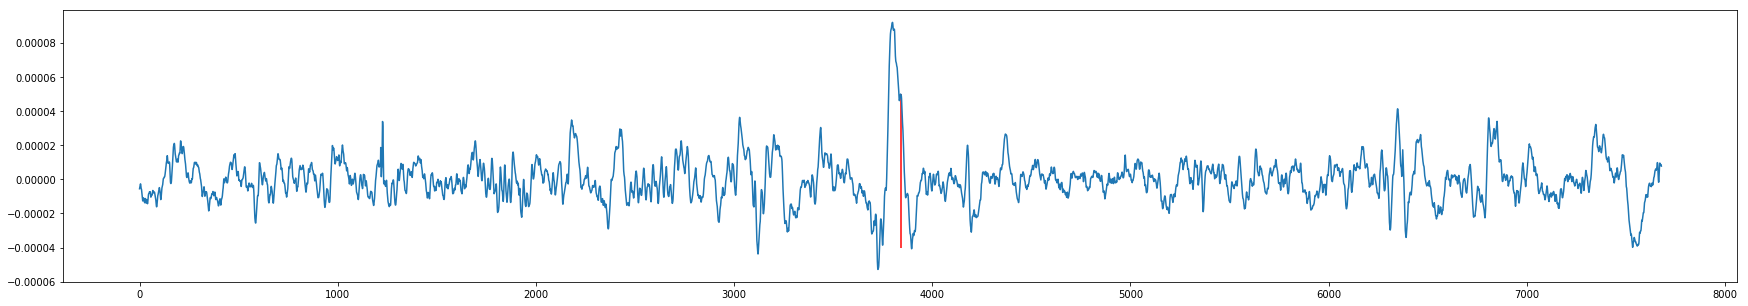

In [71]:
c[0].plotSpyke(15)